<a href="https://colab.research.google.com/github/rokzeezee/PortfolioProjects/blob/main/Economic_Analysis_using_Fred_Api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fredapi >/dev/null

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use ("fivethirtyeight")
pd.set_option("display.max_column" , 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from fredapi import Fred
fred_key = "7ed296306cad5c20c6961ccb305d203c"


Create the fred object

In [4]:
Fred =Fred(api_key= fred_key )

# Search for economic **data**

In [11]:
sp_search= Fred.search("S&P",#sort_order= "asc" ,
                       order_by="popularity")
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-30,2023-07-30,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-07-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-28 08:46:05-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-07-30,2023-07-30,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-07-30,2023-07-30,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-07-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-28 08:46:11-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-07-30,2023-07-30,S&P 500,2013-07-29,2023-07-28,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-07-28 19:11:00-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-07-30,2023-07-30,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...


In [12]:
#Fred.search("etf")

In [13]:
sp_search.shape

(1000, 15)

# Pull raw **data and plot

In [14]:
sp500 = Fred.get_series(series_id= "SP500")

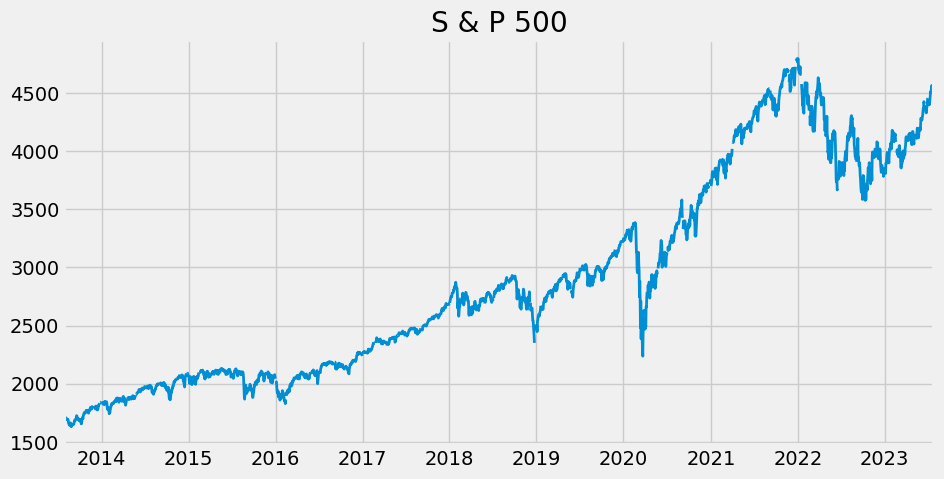

In [15]:
sp500.plot(figsize= (10,5), title = "S & P 500" ,lw = 2)


plt.show()


Pull and join multiple datas series

In [16]:
unrate = Fred.get_series("UNRATE")
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
Length: 906, dtype: float64

In [17]:
unemp_results = Fred.search("unemployment")
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-30,2023-07-30,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-07-30,2023-07-30,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 07:45:14-05:00,53,The unemployment rate represents the number of...
CCSA,CCSA,2023-07-30,2023-07-30,Continued Claims (Insured Unemployment),1967-01-07,2023-07-15,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-07-27 07:33:07-05:00,75,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-07-30,2023-07-30,Continued Claims (Insured Unemployment),1967-01-07,2023-07-15,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-07-27 07:33:12-05:00,41,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-07-30,2023-07-30,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,64,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUNTTTTUSA156S,LRUNTTTTUSA156S,2023-07-30,2023-07-30,Unemployment Rate: Aged 15 and Over: All Perso...,1960-01-01,2022-01-01,Annual,A,Percent,%,Seasonally Adjusted,SA,2023-01-13 11:52:36-06:00,1,OECD descriptor ID: LRUNTTTT OECD unit ID: STS...
COLU945UR,COLU945UR,2023-07-30,2023-07-30,"Unemployment Rate in Columbia, SC (MSA)",1990-01-01,2023-05-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-06-28 13:31:18-05:00,1,None
LAUMT451790000000003A,LAUMT451790000000003A,2023-07-30,2023-07-30,"Unemployment Rate in Columbia, SC (MSA)",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:35:51-05:00,1,None


<Axes: title={'center': 'Unemployment rate '}>

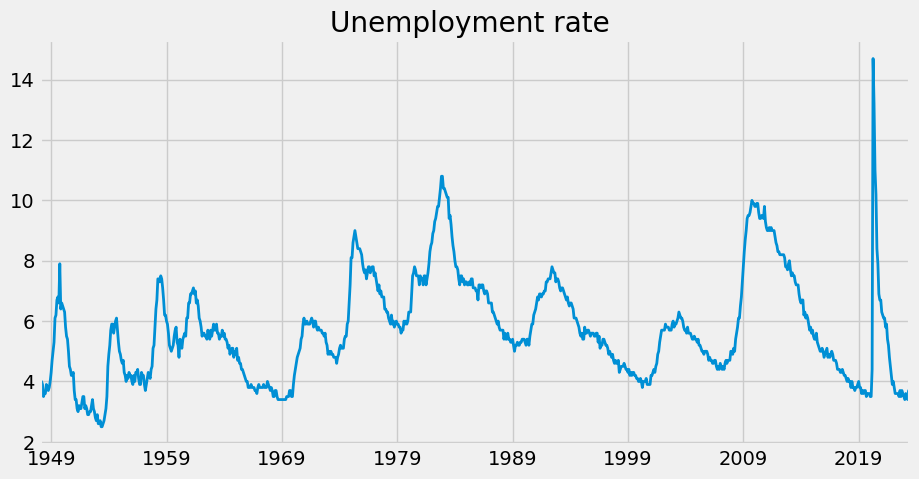

In [18]:
unrate.plot(figsize= (10,5), title = "Unemployment rate " ,lw = 2)

In [19]:
unemp_df =Fred.search("unemployment state",filter = ("frequency" ,"Monthly"))
unemp_df


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-30,2023-07-30,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-07-30,2023-07-30,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 07:45:14-05:00,53,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-07-30,2023-07-30,Unemployment Rate - Black or African American,1972-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:08-05:00,67,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2023-07-30,2023-07-30,Unemployment Level,1948-01-01,2023-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-07-07 07:45:05-05:00,66,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2023-07-30,2023-07-30,Unemployment Level,1948-01-01,2023-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2023-07-07 07:45:30-05:00,20,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWSTURN,CWSTURN,2023-07-30,2023-07-30,Unemployment Rate in West Census Region,1976-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-07-26 14:42:29-05:00,1,None
KYMLURN,KYMLURN,2023-07-30,2023-07-30,"Unemployment Rate in McLean County, KY",1990-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-28 10:26:59-05:00,1,These data come from the Current Population Su...
SYRA036UR,SYRA036UR,2023-07-30,2023-07-30,"Unemployment Rate in Syracuse, NY (MSA)",1990-01-01,2023-05-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-06-28 13:31:40-05:00,1,None


In [20]:
unemp_df= unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')

In [21]:
unemp_df=unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]


In [22]:
unemp_df =Fred.search("unemployment state",filter = ("frequency" ,"Monthly"))
unemp_df= unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')
unemp_df=unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]

In [23]:
unemp_df .index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'FLUR', 'LNS14000031', 'NYUR', 'LNS14000002', 'LNS14000024',
       'U2RATE', 'LNS14000009', 'LNS14024887', 'OHUR', 'LNS14000003', 'PAUR',
       'MIUR', 'NJUR', 'ALUR', 'ILUR', 'COUR', 'MNUR', 'NCUR', 'LNS14000001',
       'ORUR', 'LRUN64TTUSM156S', 'MAUR', 'AZUR', 'VAUR', 'AKUR',
       'LNS14027662', 'GAUR', 'ARUR', 'LNS14027660', 'WIUR', 'MDUR', 'UTUR',
       'WVUR', 'SCUR', 'WAUR', 'OKUR', 'TNUR', 'MOUR', 'NMUR', 'CTUR',
       'LNS14032183', 'KYUR', 'IAUR', 'DCUR', 'INUR', 'LNS14000018', 'KSUR',
       'NDUR', 'LAUR', 'MTUR', 'NVUR', 'LNS14000012', 'LASMT261982000000003',
       'LNS14000060', 'DEUR', 'NEUR', 'HIUR', 'NHUR', 'PRUR', 'LNS14027659',
       'SDUR', 'LASMT391746000000003', 'LRHUTTTTUSM156S', 'MSUR', 'IDUR',
       'MEUR', 'LNS14000036', 'LNS14000028', 'WYUR', 'VTUR', 'RIUR', 'CNEWUR',
       'LNS14027689', 'LNS14024230', 'LNS14000032', 'CMWRUR', 'CNERUR',
       'LRUNTTTTU

In [ ]:
#unemp_df [[
    #'UNRATE', #'LNS14000006',
 'CAUR', #'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'FLUR', #'LNS14000002',
 'U2RATE',# 'LNS14000024',
 'NYUR',
      # 'LNS14000031', 'LNS14000009', 'LNS14024887',
 'OHUR', 'MIUR',
       #'LNS14000003',
 'PAUR', 'ALUR', 'NCUR', 'NJUR', 'ILUR', 'COUR', 'MAUR',
       'MNUR',
 #'LNS14027660',
 'ORUR', ##'LNS14000001',
 'AZUR', #'LNS14027662',
       'TNUR', #'LRUN64TTUSM156S',
 'GAUR', 'KYUR', 'VAUR', 'ARUR', 'UTUR',
       'WIUR', 'WAUR', 'AKUR', 'MOUR', 'MDUR', 'WVUR', 'NMUR',# 'LNS14032183',
       'OKUR', 'LAUR', 'SCUR', 'IAUR', 'INUR', 'KSUR', 'NDUR', 'NEUR',
       #'LNS14000018',
 'CTUR', 'MTUR', #'LNS14027659', 'LNS14000060',
 'DCUR',
       #'LNS14000012',
 'NVUR', 'HIUR', 'PRUR', 'SDUR', 'DEUR', 'MSUR',
      # 'LASMT391746000000003',
 'NHUR', #'LASMT261982000000003',
 'RIUR', 'VTUR',
       'MEUR', 'WYUR', #'LRHUTTTTUSM156S',
 #'CMWRUR',
 'IDUR',
 #'LNS14000036',
       #'LNS14000028', 'LNS14000032', 'CNERUR', 'LNS14024230', 'LNS14027689',
      # 'LRUN24TTUSM156S', 'LRUNTTTTUSM156S', 'LNS14100000', 'CSOUUR', 'CNEWUR',
      # 'M08320USM156SNBR', 'LRUN25TTUSM156S', 'LNS14000315', 'LNS14000025',
      # 'LRUN25FEUSM156S'
 ]].copy()

In [24]:
 for myid in unemp_df.index:
  results =Fred.get_series(myid)
  break

In [25]:
results.to_frame(name = myid)

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2023-02-01,3.6
2023-03-01,3.5
2023-04-01,3.4
2023-05-01,3.7


In [26]:
all_results= []

for myid in unemp_df.index:
  results =Fred.get_series(myid)
  results=results.to_frame(name = myid)
  all_results.append(results)
unemp_results= pd.concat(all_results,axis=1)

In [27]:
 all_results[2]

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2023-02-01,4.4
2023-03-01,4.4
2023-04-01,4.5
2023-05-01,4.5


In [28]:
unemp_results= pd.concat(all_results,axis=1)
unemp_results.columns
#.drop(['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000002', 'LNS14000024', 'LNS14000031', 'LNS14000009', 'LNS14024887','LNS14000003', 'LNS14027660','LNS14000001', 'LNS14027662', 'LRUN64TTUSM156S', 'LNS14032183' ,'LNS14000018',  'LNS14027659', 'LNS14000060','LNS14000012', 'LASMT391746000000003', 'LASMT261982000000003','LRHUTTTTUSM156S', 'CMWRUR', 'LNS14000036','LNS14000028', 'LNS14000032', 'CNERUR', 'LNS14024230', 'LNS14027689','LRUN24TTUSM156S', 'LRUNTTTTUSM156S', 'LNS14100000', 'CSOUUR', 'CNEWUR','M08320USM156SNBR', 'LRUN25TTUSM156S', 'LNS14000315', 'LNS14000025',
#'LRUN25FEUSM156S'], axis = 1)



Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'FLUR', 'LNS14000031', 'NYUR', 'LNS14000002', 'LNS14000024',
       'U2RATE', 'LNS14000009', 'LNS14024887', 'OHUR', 'LNS14000003', 'PAUR',
       'MIUR', 'NJUR', 'ALUR', 'ILUR', 'COUR', 'MNUR', 'NCUR', 'LNS14000001',
       'ORUR', 'LRUN64TTUSM156S', 'MAUR', 'AZUR', 'VAUR', 'AKUR',
       'LNS14027662', 'GAUR', 'ARUR', 'LNS14027660', 'WIUR', 'MDUR', 'UTUR',
       'WVUR', 'SCUR', 'WAUR', 'OKUR', 'TNUR', 'MOUR', 'NMUR', 'CTUR',
       'LNS14032183', 'KYUR', 'IAUR', 'DCUR', 'INUR', 'LNS14000018', 'KSUR',
       'NDUR', 'LAUR', 'MTUR', 'NVUR', 'LNS14000012', 'LASMT261982000000003',
       'LNS14000060', 'DEUR', 'NEUR', 'HIUR', 'NHUR', 'PRUR', 'LNS14027659',
       'SDUR', 'LASMT391746000000003', 'LRHUTTTTUSM156S', 'MSUR', 'IDUR',
       'MEUR', 'LNS14000036', 'LNS14000028', 'WYUR', 'VTUR', 'RIUR', 'CNEWUR',
       'LNS14027689', 'LNS14024230', 'LNS14000032', 'CMWRUR', 'CNERUR',
       'LRUNTTTTU

In [30]:
unemp_states=unemp_results[[
    #'UNRATE', #'LNS14000006',
 'CAUR', #'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'FLUR', #'LNS14000002',
 'U2RATE',# 'LNS14000024',
 'NYUR',
      # 'LNS14000031', 'LNS14000009', 'LNS14024887',
 'OHUR', 'MIUR',
       #'LNS14000003',
 'PAUR', 'ALUR', 'NCUR', 'NJUR', 'ILUR', 'COUR', 'MAUR',
       'MNUR',
 #'LNS14027660',
 'ORUR', ##'LNS14000001',
 'AZUR', #'LNS14027662',
       'TNUR', #'LRUN64TTUSM156S',
 'GAUR', 'KYUR', 'VAUR', 'ARUR', 'UTUR',
       'WIUR', 'WAUR', 'AKUR', 'MOUR', 'MDUR', 'WVUR', 'NMUR',# 'LNS14032183',
       'OKUR', 'LAUR', 'SCUR', 'IAUR', 'INUR', 'KSUR', 'NDUR', 'NEUR',
       #'LNS14000018',
 'CTUR', 'MTUR', #'LNS14027659', 'LNS14000060',
 'DCUR',
       #'LNS14000012',
 'NVUR', 'HIUR', 'PRUR', 'SDUR', 'DEUR', 'MSUR',
      # 'LASMT391746000000003',
 'NHUR', #'LASMT261982000000003',
 'RIUR', 'VTUR',
       'MEUR', 'WYUR', #'LRHUTTTTUSM156S',
 #'CMWRUR',
 'IDUR',
 #'LNS14000036',
       #'LNS14000028', 'LNS14000032', 'CNERUR', 'LNS14024230', 'LNS14027689',
      # 'LRUN24TTUSM156S', 'LRUNTTTTUSM156S', 'LNS14100000', 'CSOUUR', 'CNEWUR',
      # 'M08320USM156SNBR', 'LRUN25TTUSM156S', 'LNS14000315', 'LNS14000025',
      # 'LRUN25FEUSM156S'
 ]].copy()

In [31]:
#unemp_states= unemp_results.dropna()
unemp_states=unemp_states.dropna()

Plot state unemployment **rate**

In [32]:
px.line(unemp_states)

In [ ]:
Pull may 2020 unemployment rate per state

In [34]:
unemp_states.index == "2020 -05-01"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

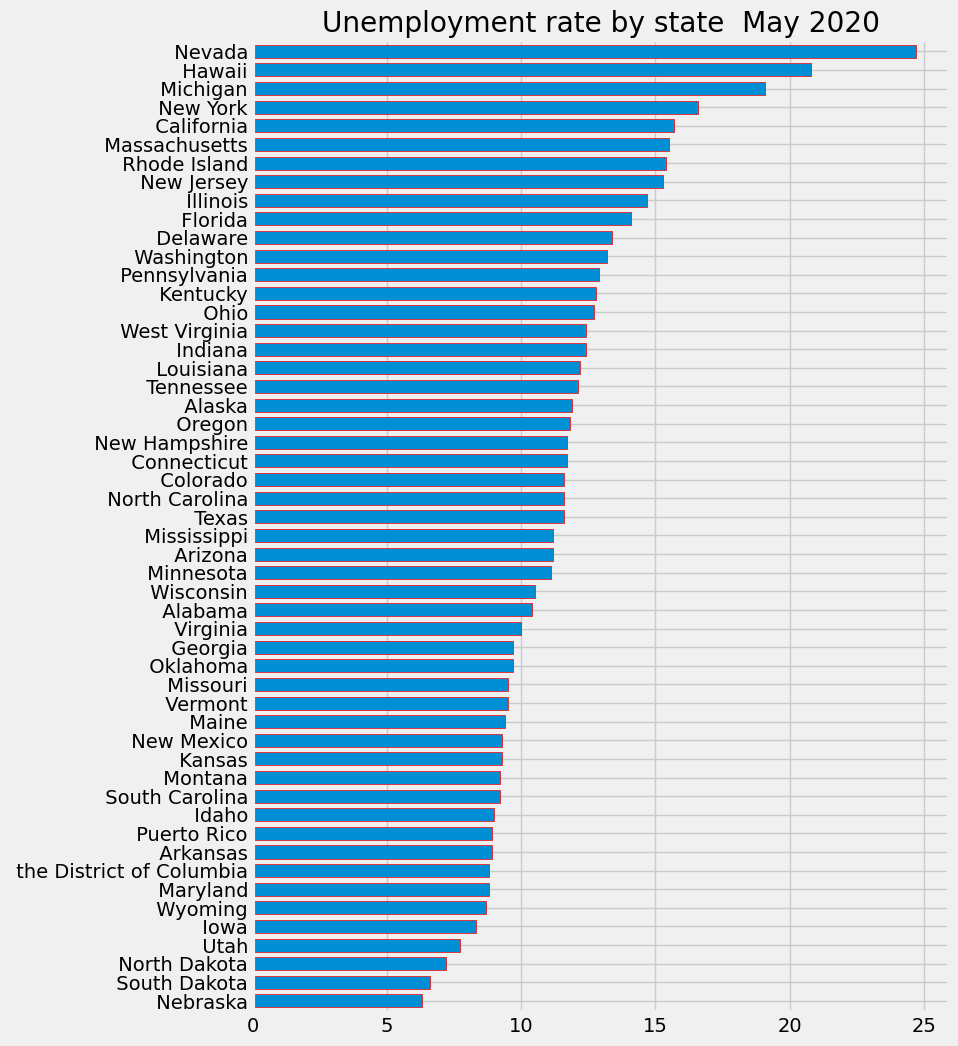

In [51]:
ax = unemp_states.loc[unemp_states.index == "2020 -05-01"].T.sort_values("2020-05-01").plot(figsize = (8,12), kind = "barh" , title = "Unemployment rate by state  May 2020", width = 0.7 ,edgecolor = "red")
ax.legend().remove()
plt.show()


In [36]:
unemp_df['title'].str.replace("Unemployment Rate in" , '').to_dict()

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': ' California',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'TXUR': ' Texas',
 'FLUR': ' Florida',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'NYUR': ' New York',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14024887': 'Unemployment Rate - 16-24 Yrs.',
 'OHUR': ' Ohio',
 'LNS14000003': 'Unemployment Rate - White',
 'PAUR': ' Pennsylvania',
 'MIUR': ' Michigan',
 'NJUR': ' New Jersey',
 'ALUR': ' Alabama',
 'ILUR': ' Illinois',
 'COUR': ' Colorado',
 'MNUR': ' Minnesota',
 'NCUR': ' North Carolina',
 'LNS14000001': 'Unemployment Rate - Men',
 'ORUR': ' Oregon',
 'LRUN64TTUSM156S': 'Unemployment Rate: 

In [37]:
 [c for c in unemp_states.columns]

['CAUR',
 'TXUR',
 'FLUR',
 'U2RATE',
 'NYUR',
 'OHUR',
 'MIUR',
 'PAUR',
 'ALUR',
 'NCUR',
 'NJUR',
 'ILUR',
 'COUR',
 'MAUR',
 'MNUR',
 'ORUR',
 'AZUR',
 'TNUR',
 'GAUR',
 'KYUR',
 'VAUR',
 'ARUR',
 'UTUR',
 'WIUR',
 'WAUR',
 'AKUR',
 'MOUR',
 'MDUR',
 'WVUR',
 'NMUR',
 'OKUR',
 'LAUR',
 'SCUR',
 'IAUR',
 'INUR',
 'KSUR',
 'NDUR',
 'NEUR',
 'CTUR',
 'MTUR',
 'DCUR',
 'NVUR',
 'HIUR',
 'PRUR',
 'SDUR',
 'DEUR',
 'MSUR',
 'NHUR',
 'RIUR',
 'VTUR',
 'MEUR',
 'WYUR',
 'IDUR']

In [38]:

unemp_df['title'].str.replace("Unemployment Rate in" , '').to_dict()

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': ' California',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'TXUR': ' Texas',
 'FLUR': ' Florida',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'NYUR': ' New York',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14024887': 'Unemployment Rate - 16-24 Yrs.',
 'OHUR': ' Ohio',
 'LNS14000003': 'Unemployment Rate - White',
 'PAUR': ' Pennsylvania',
 'MIUR': ' Michigan',
 'NJUR': ' New Jersey',
 'ALUR': ' Alabama',
 'ILUR': ' Illinois',
 'COUR': ' Colorado',
 'MNUR': ' Minnesota',
 'NCUR': ' North Carolina',
 'LNS14000001': 'Unemployment Rate - Men',
 'ORUR': ' Oregon',
 'LRUN64TTUSM156S': 'Unemployment Rate: 

In [39]:
id_to_state = unemp_df['title'].str.replace("Unemployment Rate in" , '').to_dict()

In [40]:
[id_to_state [c] for c in unemp_states.columns]

[' California',
 ' Texas',
 ' Florida',
 'Unemployment Rate - Job Losers (U-2)',
 ' New York',
 ' Ohio',
 ' Michigan',
 ' Pennsylvania',
 ' Alabama',
 ' North Carolina',
 ' New Jersey',
 ' Illinois',
 ' Colorado',
 ' Massachusetts',
 ' Minnesota',
 ' Oregon',
 ' Arizona',
 ' Tennessee',
 ' Georgia',
 ' Kentucky',
 ' Virginia',
 ' Arkansas',
 ' Utah',
 ' Wisconsin',
 ' Washington',
 ' Alaska',
 ' Missouri',
 ' Maryland',
 ' West Virginia',
 ' New Mexico',
 ' Oklahoma',
 ' Louisiana',
 ' South Carolina',
 ' Iowa',
 ' Indiana',
 ' Kansas',
 ' North Dakota',
 ' Nebraska',
 ' Connecticut',
 ' Montana',
 ' the District of Columbia',
 ' Nevada',
 ' Hawaii',
 ' Puerto Rico',
 ' South Dakota',
 ' Delaware',
 ' Mississippi',
 ' New Hampshire',
 ' Rhode Island',
 ' Vermont',
 ' Maine',
 ' Wyoming',
 ' Idaho']

In [41]:
 unemp_states.columns = [id_to_state [c] for c in unemp_states.columns]

In [42]:
 unemp_states.columns

Index([' California', ' Texas', ' Florida',
       'Unemployment Rate - Job Losers (U-2)', ' New York', ' Ohio',
       ' Michigan', ' Pennsylvania', ' Alabama', ' North Carolina',
       ' New Jersey', ' Illinois', ' Colorado', ' Massachusetts', ' Minnesota',
       ' Oregon', ' Arizona', ' Tennessee', ' Georgia', ' Kentucky',
       ' Virginia', ' Arkansas', ' Utah', ' Wisconsin', ' Washington',
       ' Alaska', ' Missouri', ' Maryland', ' West Virginia', ' New Mexico',
       ' Oklahoma', ' Louisiana', ' South Carolina', ' Iowa', ' Indiana',
       ' Kansas', ' North Dakota', ' Nebraska', ' Connecticut', ' Montana',
       ' the District of Columbia', ' Nevada', ' Hawaii', ' Puerto Rico',
       ' South Dakota', ' Delaware', ' Mississippi', ' New Hampshire',
       ' Rhode Island', ' Vermont', ' Maine', ' Wyoming', ' Idaho'],
      dtype='object')

In [43]:
  unemp_states=unemp_states[[' California', ' Texas', ' Florida',
       #'Unemployment Rate - Job Losers (U-2)',
   ' New York', ' Ohio',
       ' Michigan', ' Pennsylvania', ' Alabama', ' North Carolina',
       ' New Jersey', ' Illinois', ' Colorado', ' Massachusetts', ' Minnesota',
       ' Oregon', ' Arizona', ' Tennessee', ' Georgia', ' Kentucky',
       ' Virginia', ' Arkansas', ' Utah', ' Wisconsin', ' Washington',
       ' Alaska', ' Missouri', ' Maryland', ' West Virginia', ' New Mexico',
       ' Oklahoma', ' Louisiana', ' South Carolina', ' Iowa', ' Indiana',
       ' Kansas', ' North Dakota', ' Nebraska', ' Connecticut', ' Montana',
       ' the District of Columbia', ' Nevada', ' Hawaii', ' Puerto Rico',
       ' South Dakota', ' Delaware', ' Mississippi', ' New Hampshire',
       ' Rhode Island', ' Vermont', ' Maine', ' Wyoming', ' Idaho']].copy()

In [44]:
 unemp_states

,California,Texas,Florida,New York,Ohio,Michigan,Pennsylvania,Alabama,North Carolina,New Jersey,Illinois,Colorado,Massachusetts,Minnesota,Oregon,Arizona,Tennessee,Georgia,Kentucky,Virginia,Arkansas,Utah,Wisconsin,Washington,Alaska,Missouri,Maryland,West Virginia,New Mexico,Oklahoma,Louisiana,South Carolina,Iowa,Indiana,Kansas,North Dakota,Nebraska,Connecticut,Montana,the District of Columbia,Nevada,Hawaii,Puerto Rico,South Dakota,Delaware,Mississippi,New Hampshire,Rhode Island,Vermont,Maine,Wyoming,Idaho
1976-01-01,9.2,5.8,9.7,10.3,8.1,9.9,8.0,6.6,6.4,10.3,6.6,5.8,10.5,6.0,9.5,10.2,6.0,8.4,5.6,6.1,7.3,5.8,5.8,8.5,7.1,5.9,6.4,7.5,8.6,5.8,6.3,7.4,4.3,6.6,4.2,3.4,3.3,9.8,5.8,8.7,9.2,9.8,19.6,3.3,8.0,6.7,6.5,7.8,8.6,8.7,4.1,5.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,9.9,8.1,6.6,6.4,10.3,6.6,5.7,10.5,6.0,9.5,10.2,6.0,8.4,5.6,6.1,7.3,5.9,5.8,8.5,7.1,5.9,6.4,7.5,8.7,5.8,6.3,7.4,4.3,6.6,4.2,3.4,3.3,9.8,5.8,8.7,9.2,9.8,19.5,3.3,8.0,6.7,6.5,7.8,8.6,8.7,4.1,5.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,9.9,8.1,6.6,6.4,10.3,6.6,5.7,10.5,5.9,9.4,10.1,6.0,8.4,5.6,6.1,7.3,5.8,5.7,8.4,7.0,5.9,6.4,7.5,8.7,5.8,6.3,7.3,4.3,6.5,4.2,3.4,3.3,9.8,5.8,8.6,9.2,9.8,19.3,3.2,8.0,6.6,6.5,7.7,8.6,8.6,4.1,5.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,9.8,8.1,6.5,6.3,10.3,6.6,5.6,10.3,5.8,9.2,10.0,6.0,8.3,5.6,6.0,7.2,5.8,5.6,8.5,6.9,6.0,6.4,7.5,8.6,5.8,6.4,7.2,4.2,6.3,4.2,3.5,3.2,9.6,5.8,8.5,9.0,9.7,19.0,3.1,8.1,6.4,6.5,7.7,8.6,8.6,4.0,5.6
1976-05-01,9.0,5.9,9.3,10.1,7.8,9.6,8.1,6.4,6.1,10.3,6.6,5.6,10.1,5.7,9.1,9.8,5.9,8.1,5.5,5.9,7.1,5.7,5.5,8.5,6.9,6.0,6.5,7.4,8.6,5.7,6.5,7.0,4.1,6.0,4.2,3.6,3.1,9.4,5.8,8.4,8.9,9.4,18.9,3.1,8.3,6.3,6.5,7.7,8.5,8.5,3.9,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,4.4,4.0,2.6,4.2,3.9,4.3,4.4,2.5,3.6,3.5,4.5,2.9,3.7,3.0,4.7,3.7,3.5,3.1,3.9,3.2,3.2,2.4,2.7,4.6,3.8,2.6,2.9,3.7,3.6,3.0,3.6,3.2,2.9,3.1,2.9,2.1,2.3,4.0,2.4,4.7,5.5,3.6,6.0,2.1,4.6,3.7,2.7,3.1,2.8,2.8,3.8,2.6
2023-03-01,4.4,4.0,2.6,4.1,3.8,4.1,4.2,2.3,3.5,3.5,4.4,2.8,3.5,2.8,4.4,3.5,3.4,3.1,3.8,3.2,3.0,2.4,2.5,4.5,3.7,2.5,2.7,3.4,3.5,3.0,3.6,3.2,2.8,3.1,2.9,2.1,2.1,3.9,2.3,4.8,5.5,3.5,6.0,1.9,4.4,3.5,2.4,3.1,2.7,2.6,3.7,2.6
2023-04-01,4.5,4.0,2.6,4.0,3.7,3.8,4.1,2.2,3.4,3.5,4.2,2.8,3.1,2.8,4.0,3.4,3.3,3.1,3.7,3.1,2.8,2.3,2.4,4.3,3.7,2.5,2.5,3.3,3.5,2.9,3.6,3.1,2.7,3.0,2.9,2.1,2.0,3.8,2.3,5.0,5.4,3.3,6.0,1.9,4.3,3.4,2.1,3.0,2.4,2.4,3.5,2.6
2023-05-01,4.5,4.1,2.6,3.9,3.6,3.7,4.0,2.2,3.4,3.6,4.1,2.8,2.8,2.9,3.7,3.4,3.3,3.2,3.8,2.9,2.7,2.3,2.4,4.1,3.6,2.5,2.4,3.3,3.5,2.8,3.6,3.1,2.7,3.1,2.9,2.1,1.9,3.7,2.3,5.1,5.4,3.1,6.1,1.9,4.2,3.2,1.9,3.0,2.1,2.4,3.3,2.6


import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_159427697481071374, *[' California'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_159427697481071374, *[' Texas'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_159427697481071374, *[' Florida'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_159427697481071374, *[' New York'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_159427697481071374, *[' California'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_159427697481071374, *[' Texas'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_159427697481071374, *[' Florida'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_159427697481071374, *[' New York'], **{})
chart

import numpy as np
from google.colab import autoviz
df_159427697481071374 = autoviz.get_df('df_159427697481071374')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_159427697481071374, *[[[' California', ' Texas'], [' Texas', ' Florida'], [' Florida', ' New York'], [' New York', ' Ohio']]], **{})
chart

# **Pull participation Rate**